# Step 1 : import library and load the data

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

%matplotlib inline

In [2]:
data=pd.read_csv('data_K_Means_Clustering.csv')
data.head()


,Unnamed: 0,x,y,cluster
0,0,-8.482852,-5.603349,2
1,1,-7.751632,-8.405334,2
2,2,-10.967098,-9.032782,2
3,3,-11.999447,-7.606734,2
4,4,-1.736810,10.478015,1


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   x           200 non-null    float64
 2   y           200 non-null    float64
 3   cluster     200 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.4 KB


In [5]:
data['cluster'].value_counts()

cluster
1    67
0    67
2    66
Name: count, dtype: int64

# Step 2 :plotiing the graph to get the idea of clusters

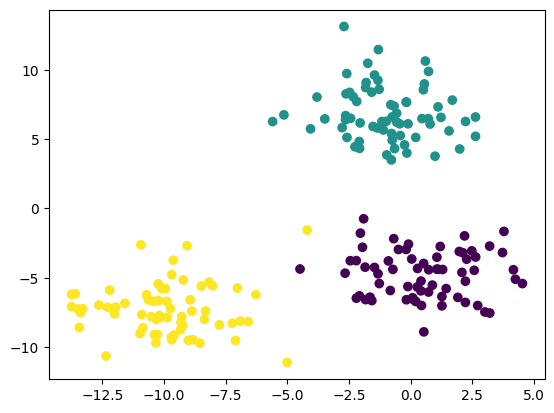

In [6]:
plt.scatter(data['x'], data['y'], c = data['cluster'])


# Step 3 : K-Means for clustering
The K-Means algorithm is a simple algorithm capable of clustering the same kind of dataset very quickly and efficiently, often in just a few iterations.Its an unsupervised machine learning technique.

Let’s train a K-Means cluster on this dataset. It will try to find each blob's center and assign each instance to the closed blob.

Importing K – Means from sklearn cluster at first.

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
X = data[['x', 'y']]
y = data['cluster']

In [9]:
X

,x,y
0,-8.482852,-5.603349
1,-7.751632,-8.405334
2,-10.967098,-9.032782
3,-11.999447,-7.606734
4,-1.736810,10.478015
...,...,...
195,-8.820126,-9.479259
196,-1.573419,-6.650994
197,-2.619581,8.269253
198,-2.634418,6.697531


In [10]:
y

0      2
1      2
2      2
3      2
4      1
      ..
195    2
196    0
197    1
198    1
199    2
Name: cluster, Length: 200, dtype: int64

# Step:4 We standardize the dataset before training the algorithm 

We standardize the dataset before training the algorithm 
because the variable can of incomparable units (eg one in cm other in kg) so we should standardize variables.
Also when the data show quite a different variances it is a good practice to standardize the data.

This will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude (income in this case). ... Hence, it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN or K-Means.

example:
If you have mixed numerical data, where each attribute is something entirely different (say, shoe size and weight), has different units attached (lb, tons, m, kg ...) then these values aren't really comparable anyway; z-standardizing them is a best-practise to give equal weight to them.

If you have binary values, discrete attributes or categorial attributes, stay away from k-means. K-means needs to compute means, and the mean value is not meaningful on this kind of data.

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.01200363, -0.60606415],
       [-0.86550679, -1.04265203],
       [-1.5097118 , -1.14041707],
       [-1.71653856, -0.91821912],
       [ 0.33953731,  1.89963378],
       [ 0.38183922,  1.1890842 ],
       [ 0.24668446, -0.74232845],
       [-1.44313178, -0.76182643],
       [ 0.32130834, -0.75849023],
       [ 0.83110494,  1.27684537],
       [ 0.31775088, -0.39338956],
       [ 1.20365218, -0.4290876 ],
       [-0.07305683,  1.51966781],
       [ 0.63827173,  0.98134203],
       [ 1.52205697, -0.42280098],
       [ 0.17043691,  1.06578799],
       [ 1.5381542 , -0.52935538],
       [ 0.27161133, -0.71651135],
       [-1.35289151, -0.93641563],
       [ 0.79308339, -0.35212834],
       [ 0.14633873,  2.31330628],
       [ 1.14228061, -0.30354302],
       [ 1.12503491, -0.04177872],
       [-1.17977302, -1.09578279],
       [-2.01238779, -0.86540408],
       [ 0.19152374,  1.57228952],
       [ 0.83261025,  1.80799546],
       [ 0.66508288, -0.6110459 ],
       [-1.12827817,

## Now we impute back the standardized data in our dataset and train the algorithm.

In [12]:
data[['x', 'y']] = X

# Step 5: Get the clusters

## 1st way to do this by setting clusters by ourself

## We are taking the number of clusters k as two for time being.

Note that you have to specify the number of clusters k that the algorithm must find. In this dataset, it is pretty obvious from looking at the data that k should be set to 3, but we choose it 2 as of now. Also in general it is not that easy to find the number of clusters.

Later we will see the method to find the optimal number of cluster for a dataset.

In [30]:
k=2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)     #fitting of training data here X is our training data

filename = 'kmeans_model.joblib'
joblib.dump(kmeans, filename)

['kmeans_model.joblib']

In [14]:
kmeans.labels_     #this is model is predicting right now


array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1], dtype=int32)

### We will take a look at the two centroid that the algorithm found:

In [15]:
center = kmeans.cluster_centers_
center

# The iris database has 4 features (X.shape = (150,4)), 
# you want Kmeans to get two centroids in 4-dimensional feature space. 
# cluster_centers_ does exactly that, each entry of list corresponds to the coordinates of the centroid in R^4.

# 2 rows because we have 2 clusters 2 dimension

# 2 dimension x,y
# 2 cluster 0,1

array([[ 0.63701655,  0.42500526],
       [-1.32303438, -0.88270323]])

In [16]:
#contingency table which shows the frequency distribution of the data points

# its like frequency table

In [17]:
pd.crosstab(data['cluster'],kmeans.labels_)

col_0,0,1
cluster,,
0,67,0
1,67,0
2,1,65


In [18]:
# pairwise_distances(X, y, metric='euclidean')

# Now plotting the dataset and each centroid.

you need to understand how it works?

Assuming we have inputs x_1, x_2, x_3, …, x_nx

Step 1 – Pick K random points as cluster centers called centroids.
Step 2 – Assign each x_i to nearest cluster by calculating its distance to each centroid.
Step 3 – Find new cluster center by taking the average of the assigned points.
Step 4 – Repeat Step 2 and 3 until none of the cluster assignments change.

In [19]:
# center[0][0]

In [20]:
# center[0][1]

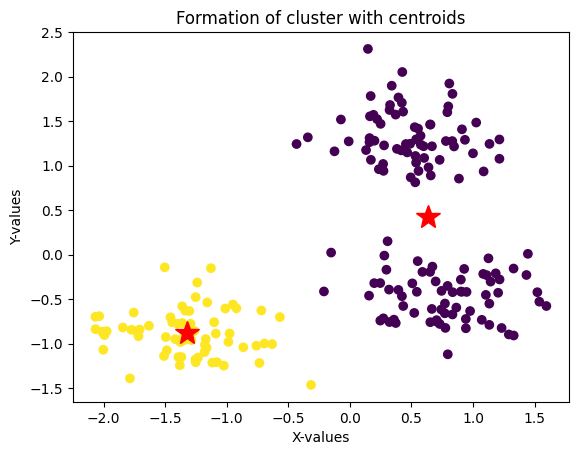

In [21]:
# plt.scatter(data['x'], data['y'], c = kmeans.labels_, cmap = 'viridis')  cmap stands for colors in the map

plt.scatter(data['x'], data['y'], c = kmeans.labels_) #groupby labels by sum of the numbers which are falling in that particular label

# here c= kmeans.labels_ is acting like colours in the scatter plot

plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of cluster with centroids')
for i, point in enumerate(center):        #ENUMERATE means this will count the number of center
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)


With number of cluster as 2 thecentroid (marked as red star above) are pretty obivious.

# Most important, when to stop increasing K?

We often know the value of K. In that case we use the value of K. Else we use the Elbow Method.



# 2nd way of doing k means clustering is elbow method

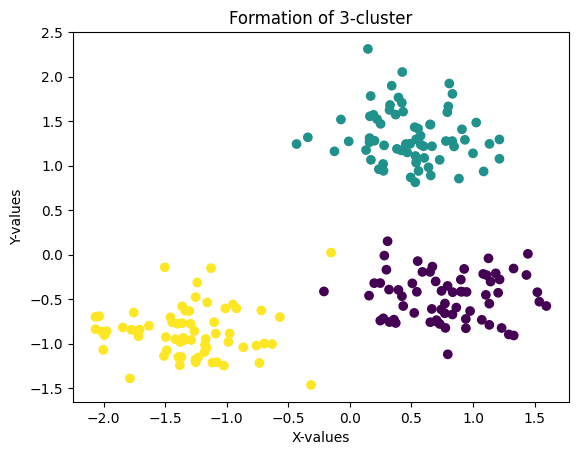

In [22]:
plt.scatter(data['x'], data['y'], c = data['cluster'])
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of 3-cluster')
plt.show()

here we can easily visualize 3 clusters. So, now we will see how we can find out the right value for K (number of cluster)

# Error Sum of Squares (SSE)
It is the sum of the squared differences between each observation
and its group’s mean. We can use it as a measure of variation within a cluster.
All cases within a cluster are identical then SSE would be equal to 0. 
We run the algorithm for different values of K(say K = 10 to 1) and 
plot the K values against SSE(Sum of Squared Errors).
And select the value of K for the elbow point as shown in the figure.

RSS     = residual sum of squares

y_i     = i^th value of the variable to be predicted

f(x_i)  = predicted value of y_i

n       = upper limit of summation

In [23]:
# Here the metric inertia is nothing but the mean squared distance between each instance and its closest centroid.

# SSE = sum of suqred error
# index= k

SSE = []
index = range(1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)     #inertia tells us how far away the datapoint within a cluster it starts with 1 and goes up
    print(i,kmeans.inertia_)

1 400.0
2 156.41033617954903
3 44.057048453292786
4 36.7163650547325
5 34.027455721362
6 28.19604994816352
7 25.50531438883722
8 20.100707498268466
9 18.854738046945428


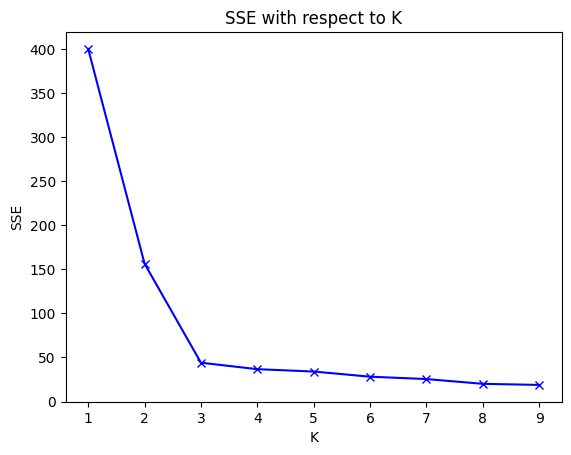

In [24]:
# where index is nothing but numbers of clusters, SSE is squared distance, 'bx-' is the symbol that i want to plot on gragh
plt.plot(index, SSE ,'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('SSE with respect to K')
plt.show()

# 3 rd way of finding clustering in kmeans

In [28]:
a

<class 'sklearn.cluster._kmeans.KMeans'>


col_0,0,1,2
cluster,,,
0,67,0,0
1,0,67,0
2,1,0,65


its like freuency table


in the last line we can see the 65 in last row and 1 point in other cluster because that is missclassification

In [26]:
center = kmeans.cluster_centers_
center

# 2 dimension x,y
# 3 cluster 0,1,2

array([[ 0.77978594, -0.46921203],
       [ 0.49211628,  1.33256907],
       [-1.32303438, -0.88270323]])

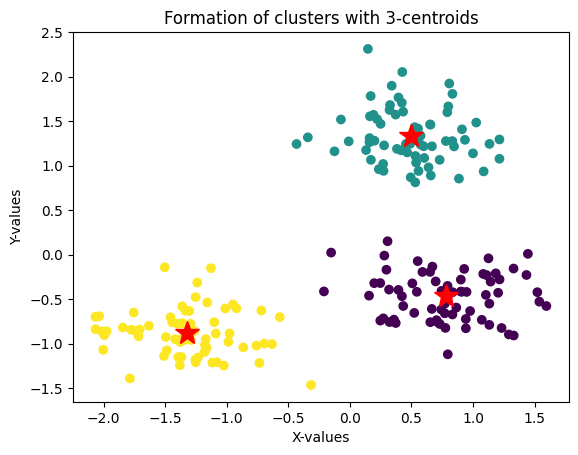

In [27]:

plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.title('Formation of clusters with 3-centroids')

plt.scatter(data['x'], data['y'], c = kmeans.labels_, cmap = 'viridis')
for i, point in enumerate(center):
    plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)